## List
<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li><a href="#EDA">Dataset Description</a></li>
    <li><a href="#EDA">Exploratory Data Analysis</a></li>
    <li><a href="#data_preprocessing">Data Preparation and Preprocessing</a></li>
    <li><a href="#data_modeling">Data Modeling and Evaluation</a></li>
</ol>
</div>
<hr>


### 1. Dataset Description

This dataset consist of data From 1985 Ward's Automotive Yearbook (You can access the dataset in https://www.kaggle.com/datasets/toramky/automobile-dataset). Here are the sources:
1) 1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook.
2) Personal Auto Manuals, Insurance Services Office, 160 Water Street, New York, NY 10038
3) Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037

This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc.), and represents the average loss per car per year.

Note: Several of the attributes in the database could be used as a "class" attribute.

### 2. Exploratory Data Analysis
<div style="text-align: justify">In this step, we will explore variables that have a relationship with variable of "price". The first step is to import the library that will be used to explor the data. We will use three library to help analysis data. </div>

In [1]:
import pandas as pd             #Data processing
import numpy as np              #Algebra operation
import seaborn as sns           #Data visualization
import matplotlib.pyplot as plt #Data visualization

<div style="text-align: justify">We can use pandas for read the dataset. The dataset is stored in dataframe df. </div>

In [2]:
df = pd.read_csv('automobile_data.csv') #Read dataset
df.head()                               #Display the top 5 data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
df.shape

(205, 26)

In [4]:
def explore(df):
    return (pd.DataFrame({'data type':df.dtypes, 
                         'unique':df.nunique(), 
                         'uni_values':[df[x].unique() for x in df.columns]
                         }))
explore(df)

,data type,unique,uni_values
symboling,int64,6,"[3, 1, 2, 0, -1, -2]"
normalized-losses,object,52,"[?, 164, 158, 192, 188, 121, 98, 81, 118, 148,..."
make,object,22,"[alfa-romero, audi, bmw, chevrolet, dodge, hon..."
fuel-type,object,2,"[gas, diesel]"
aspiration,object,2,"[std, turbo]"
num-of-doors,object,3,"[two, four, ?]"
body-style,object,5,"[convertible, hatchback, sedan, wagon, hardtop]"
drive-wheels,object,3,"[rwd, fwd, 4wd]"
engine-location,object,2,"[front, rear]"
wheel-base,float64,53,"[88.6, 94.5, 99.8, 99.4, 105.8, 99.5, 101.2, 1..."


In [5]:
df.loc[df["price"].values == "?", "price"] = np.NaN
df.dropna(inplace=True)
df["price"] = df["price"].astype("int")


In [6]:
df.shape

(201, 26)

In [7]:
temp = pd.DataFrame(df.isna().sum())                     #sum missing values in each rows
temp.columns = ["Count of Missing Values"]               #create column about count of missing values
temp.iloc[temp["Count of Missing Values"].values > 0, :] #check missing value in each columns

,Count of Missing Values


<div style="text-align: justify">It is known that the total variables in the dataset are 29 variables (28 independent variables and 1 target variable) with 201 data in it. The types of each variable are object, float, and integer. There is some missing value in variables "stroke" and "horsepower-binned". Before we explore the data, we need to remove rows that have missing values first. The way to remove missing value data is to drop it because the amount of missing value data is not more than 5%, so we will not lose information from the data to be explored.</div>

In [8]:
df.dropna(inplace=True)                  #drop missing value
df.reset_index(inplace=True)             #reset index after drop missing value
df.drop(columns=["index"], inplace=True) #drop column "index" (result column of index reset)
df                                       #display data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


<div style="text-align: justify">The total rows after being dropped are 196 rows. After that, let's explore data together.</div>

In [9]:
df[['bore','stroke' ,'compression-ratio','horsepower']]

,bore,stroke,compression-ratio,horsepower
0,3.47,2.68,9.0,111
1,3.47,2.68,9.0,111
2,2.68,3.47,9.0,154
3,3.19,3.4,10.0,102
4,3.19,3.4,8.0,115
...,...,...,...,...
196,3.78,3.15,9.5,114
197,3.78,3.15,8.7,160
198,3.58,2.87,8.8,134
199,3.01,3.4,23.0,106


<div style="text-align: justify">Firstly, we look at the characteristics of the variables by doing descriptive statistics. The describe method automatically performs statistical computations for all continuous variables. The results of this method are shown as follows:</div>
<ul>
    <li>The count of that variable</li>
    <li>Mean</li>
    <li>Standard deviation (std)</li> 
    <li>Minimum value</li>
    <li>IQR (Interquartile Range: 25%, 50% dan 75%)</li>
    <li>Maxmum value</li>
<ul>

In [10]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,10.164279,25.179104,30.686567,13207.129353
std,1.254802,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,4.004965,6.423220,6.815150,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,8.600000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,9.400000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


<div style="text-align: justify">By default describe ignores variables of type object. We can use the describe method on object variables in the following way:</div>

In [11]:
df.describe(include=['object'])

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm
count,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201
unique,52,22,2,2,3,5,3,2,6,7,8,39,37,59,23
top,?,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.4,68,5500
freq,37,32,181,165,113,94,118,198,145,157,92,23,19,19,36


In [12]:
df["aspiration"]

0        std
1        std
2        std
3        std
4        std
       ...  
196      std
197    turbo
198      std
199    turbo
200    turbo
Name: aspiration, Length: 201, dtype: object

In [13]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [14]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


In [15]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


In [16]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [17]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,198
rear,3


### 3. Data Preparation and Preprocessing
<div style="text-align: justify">In this step, we will preparation and preprocessing data before create prediction model. Firstly, We search for the independent variable closely related to the target variable using the Pearson correlation method. The results of the correlations performed for each variable are shown below.</div>

Text(0.5, 1.0, 'Correlation between Variables')

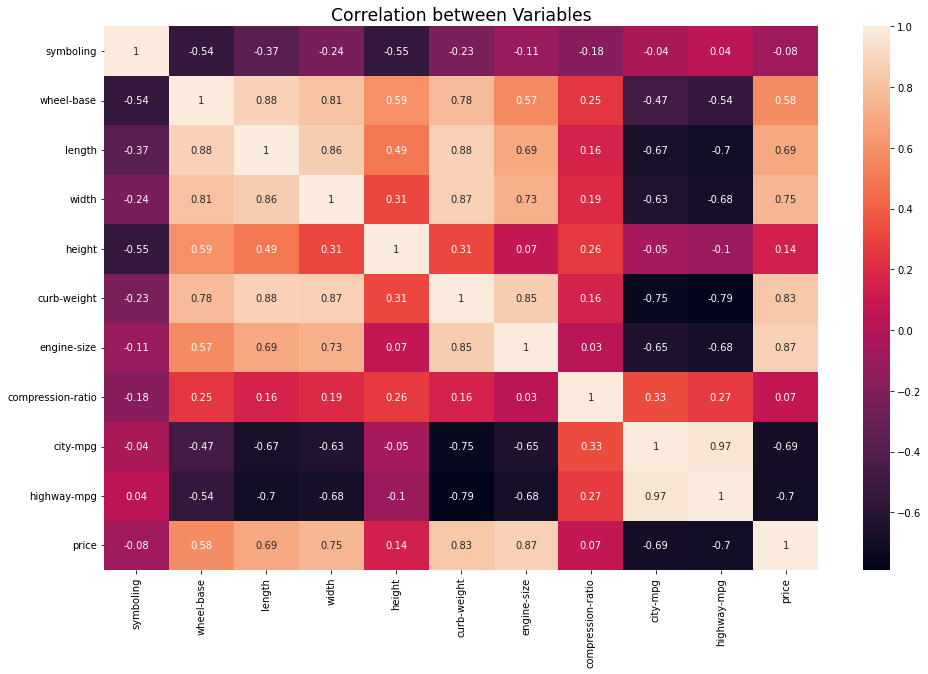

In [18]:
plt.figure(figsize=(16, 10))                                    #resize figure
sns.heatmap(round(df.corr(), 2), annot=True)                    #show heatmap
plt.title("Correlation between Variables", fontsize="xx-large") #show title

In [19]:
df1 = round(df.corr(), 2)
df1.drop(columns=['price'], inplace=True)

In [20]:
col = []
for i in df1.columns:
    k = np.abs(df1.loc['price', i])
    if k >= 0.8:
        print(i, ":", k)
        col.append(i)
    else:
        pass

curb-weight : 0.83
engine-size : 0.87


In [21]:
X = df["engine-size"]  #independent variable
#X = df["curb-weight"]  #independent variable 
Y = df["price"]         #target variable

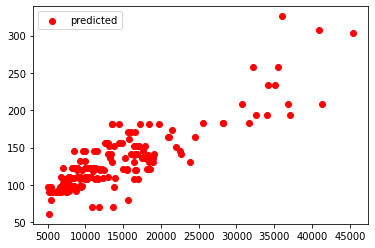

In [22]:
plt.scatter(Y, X, color="red", label="predicted")
plt.legend()
plt.show() 

Split the dataset into 2 parts: data train and data test

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 42)
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]
y_train = y_train[:, np.newaxis]
y_test = y_test[:, np.newaxis]

C:\Users\USER\AppData\Local\Temp\ipykernel_796\4081099118.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = X_train[:, np.newaxis]
C:\Users\USER\AppData\Local\Temp\ipykernel_796\4081099118.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_test = X_test[:, np.newaxis]
C:\Users\USER\AppData\Local\Temp\ipykernel_796\4081099118.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_train = y_train[:, np.newaxis]
C:\Users\USER\AppData\Local\Temp\ipykernel_796\4081099118.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and w

In [24]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140, 1)
(140, 1)
(61, 1)
(61, 1)


### 4. Data Modeling and Evaluation
<div style="text-align: justify">In this step, we will make AI model for prediction price of automobile using two algorithms, Linear Regression and Random Forest Regressor.</div>

#### 4.1. Linear Regression Algorithm

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

#### 4.2. Random Forest Regressor Algorithm

In [26]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(criterion="absolute_error",
                           verbose=1).fit(X_train, y_train)
y_pred2 = rf.predict(X_test)

C:\Users\USER\AppData\Local\Temp\ipykernel_796\3494360735.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(criterion="absolute_error",
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


#### 4.3. Summary

In [27]:
print("1. Linear Regression Model")
print("   Intercept  :", round(lr.intercept_[0], 2))
print("   coefficient:", round(lr.coef_[0][0], 2))
print("   R2 score   :", round(r2_score(y_test, y_pred), 2))
print("   MAE        :", round(mean_absolute_error(y_test, y_pred), 2))
print("2. Random Forest Regression Model")
print("   R2 score   :", round(r2_score(y_test, y_pred2), 2))
print("   MAE        :", round(mean_absolute_error(y_test, y_pred2), 2))

1. Linear Regression Model
   Intercept  : -5760.15
   coefficient: 147.93
   R2 score   : 0.73
   MAE        : 3578.6
2. Random Forest Regression Model
   R2 score   : 0.86
   MAE        : 2532.02


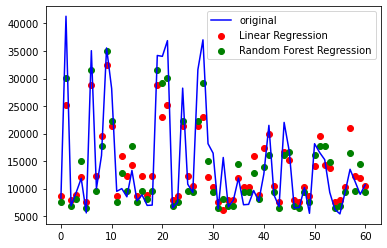

In [28]:
x = list(range(len(y_test)))
plt.plot(x, y_test, color="blue", label="original")
plt.scatter(x, y_pred, color="red", label="Linear Regression")
plt.scatter(x, y_pred2, color="green", label="Random Forest Regression")
plt.legend()
plt.show() 

### REFERRENCES
S. Raschka, _Python Machine Learning_, Birmingham Mumbai: Packt Publishing Open Source, 2015.